In [78]:
import math
import numpy as np
import UsefulFunctions as uf
from scipy.interpolate import make_lsq_spline, BSpline
import json
import matplotlib

from matplotlib import pyplot as plt
from MMILegend import mmimap, mmi_cmap, draw_colorbar

plt.rcParams.update({'font.size': 12})

eq_labels = ['1 Tintina','2 RSZ','3 MSZ','4 FSZ','5 SSZ','6 NF']
for i in range(7, 12):
    eq_labels.append(f'{i} Denali')
for i in range(12, 14):
    eq_labels.append(f'{i} CM')

with open('Data/Interior Crustal/Interior Community Data.json') as json_file:
    comm_dict = json.load(json_file)
print(len(comm_dict.keys()))

plt.rc('axes', titlesize=12, labelsize=10)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)


12


In [2]:
# # region Graph X By Scenario
# fig, ax = plt.subplots(2, 5, figsize=(14, 8))
# plots = {}
# n = 0
# grays = ['dimgray', 'silver', 'gainsboro']
# for name, data in comm_dict.items():
#     index = (n // 5, n % 5)
#     ax[index].plot(data['wt'], marker='o', markersize=2, lw=1, c='k', ls='--', label='Warning time (s)')
#     for i in range(0, 3):
#         ax[index].axhline(i*10, lw=0.5, c=grays[i], ls=':')
#     wt = ax[index].scatter(x=range(0,13),y=data['wt'], s=40, marker='o', c=data['mmi'], cmap=mmi_cmap,
#                                    ls='--', label='Warning time (s)', vmin=0, vmax=10)
#     ax[index].set_ylabel('Warning Time (s)')
#     ax[index].set_title(name)
#     ax[index].set_ylim(-20, 120)

#     # ax2 = ax[n // 5, n % 5].twinx()
#     # pga, = ax2.plot(data['pga'], marker='o', c='r', label='PGA (%g)', markersize=0.5, lw=0.3)
#     # ax2.set_ylabel('PGA (%g)', c='r')
#     # ax2.set_yscale('log')
#     # ax[n // 5, n % 5].legend(handles=[wt, pga])
#     n += 1
# # plt.clim[1,8]
# # plt.rc('xtick', labelsize=12)
# # cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.05])
# # fig.colorbar(wt, cax=cbar_ax, orientation='horizontal',label='MMI')
# plt.rc('xtick', labelsize=10)

# draw_colorbar(fig, mmimap, None)
# plt.text(0.48, 1.2, 'MMI', fontsize=16)
# plt.suptitle('Newlist Community Scenario Data', fontsize=18)
# plt.tight_layout(rect=[0, 0.1, 1, 0.99])
# plt.savefig('Figures/Interior Crustal/Interior Community Data colored markers.pdf')
# endregion

# region Graph X by MMI
# fig, ax = plt.subplots(2, 5, figsize=(14, 8))
# plots = {}
# n = 0
# grays = ['dimgray', 'silver', 'gainsboro']

# for name, data in comm_dict.items():
#     index = (n // 5, n % 5)

#     data_sorted = np.vstack((np.array(data['wt']), np.array(data['mmi']), np.array(data['pga'])))
#     data_sorted = data_sorted[:, data_sorted[1, :].argsort()]

#     # x_new = np.linspace(min(data['pga']), max(data['pga']), 500)
#     # spl = make_lsq_spline(data_sorted[2, :], data_sorted[0, :])
#     # smooth = spl(x_new)
#     # ax[index].plot(x_new, smooth, ls='--', lw=0.5)

#     ax[index].scatter(x=data_sorted[1, :], y=data_sorted[0, :], marker='.', s=40, lw=1, c='k', ls='--', label='Warning time (s)')
#     for i in range(0, 3):
#         ax[index].axhline(i*10, lw=0.5, c=grays[i], ls=':')

#     ax[index].set_ylabel('Warning Time (s)')
#     ax[index].set_xlabel('MMI')
#     ax[index].set_title(name)
#     ax[index].set_ylim(-20, 120)
#     ax[index].set_xticks(range(1, 10))
#     ax[index].set_xticklabels(range(1, 10))

#     # ax2 = ax[n // 5, n % 5].twinx()
#     # pga, = ax2.plot(data['pga'], marker='o', c='r', label='PGA (%g)', markersize=0.5, lw=0.3)
#     # ax2.set_ylabel('PGA (%g)', c='r')
#     # ax2.set_yscale('log')
#     # ax[n // 5, n % 5].legend(handles=[wt, pga])
#     n += 1
# # plt.clim[1,8]
# # plt.rc('xtick', labelsize=12)
# # cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.05])
# # fig.colorbar(wt, cax=cbar_ax, orientation='horizontal',label='MMI')
# plt.rc('xtick', labelsize=10)

# # draw_colorbar(fig, mmimap, None)
# # plt.text(0.48, 1.2, 'MMI', fontsize=16)
# plt.suptitle('Interior Community Scenario Data', fontsize=18)
# plt.tight_layout(rect=[0, 0.1, 1, 0.99])
# plt.savefig('Figures/Interior Crustal/Interior Community Data Increasing MMI.pdf')
# # endregion


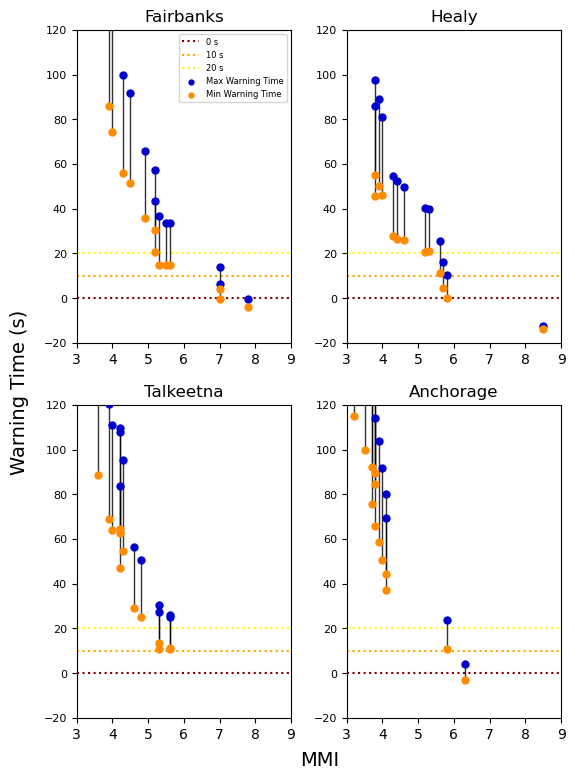

In [82]:

# Graph X by MMI (4)
fig, ax = plt.subplots(2, 2, figsize=(6, 8))
plots = {}
n = 0
s = 100
warn_colors = ['maroon', 'orange', 'yellow']

for name, data in comm_dict.items():
    if name == 'Fairbanks':
        index = (0, 0)
        # ax[index].set_ylabel('Warning Time (s)')
        # ax[index].set_xlabel('MMI')
    elif name == 'Healy':
        index = (0, 1)
    elif name == 'Talkeetna':
        index = (1, 0)
    elif name == 'Anchorage':
        index = (1, 1)
    else:
        continue

    data_sorted = np.vstack((np.array(data['wtfast']), np.array(data['wtslow']), np.array(data['mmi']), np.array(data['pga']), np.arange(1, 14, 1).astype(int)))
    data_sorted = data_sorted[:, data_sorted[2, :].argsort()]

    for i in range(0, 3):
        ax[index].axhline(i*10, lw=1.5, c=warn_colors[i], ls=':', zorder=0, label='%i s' % (i*10))
    # ax[index].scatter(x=data_sorted[2, :], y=data_sorted[0, :], marker='o', s=100, c='darkorange', label='Min WT', zorder=4, alpha=0.8)
    # ax[index].scatter(x=data_sorted[2, :], y=data_sorted[1, :], marker='o', s=100, c='darkblue', label='Max WT', zorder=4, alpha=0.8)
    
    for i in range(0, 13):
        if i == 0: 
            label = 'WT range'
        else: 
            label = False 
        ax[index].vlines(x=data_sorted[2, i], ymin=data_sorted[0, i], ymax=data_sorted[1, i], lw=1, color='k', label=None, zorder=3, alpha=0.8)
    
    ax[index].scatter(x=data_sorted[2, :], y=data_sorted[1, :], marker='.', s=s, c='mediumblue', zorder=4, alpha=1, label='Max Warning Time')
    ax[index].scatter(x=data_sorted[2, :], y=data_sorted[0, :], marker='.', s=s, c='darkorange', zorder=4, alpha=1, label='Min Warning Time')

    # for i in range(0, 13):
        # ax[index].text(x=data_sorted[2, i], y=data_sorted[0, i], s='%i' % data_sorted[4, i], zorder=5, fontsize=7, color='k', ha='center', va='center')
        # ax[index].text(x=data_sorted[2, i], y=data_sorted[1, i]-.5, s='%i' % data_sorted[4, i], zorder=5, fontsize=7, color='w', ha='center', va='center')
        


    if name == 'Fairbanks':
        ax[index].legend(loc='upper right', fontsize=6, markerscale=0.7)
    ax[index].set_title(name, fontsize=12)
    ax[index].set_ylim(-20, 120)
    ax[index].set_xticks(range(3, 10))
    ax[index].set_xticklabels(range(3, 10))
    # ax[index].set_xticklabels(['III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX'])

    # ax2 = ax[n // 5, n % 5].twinx()
    # pga, = ax2.plot(data['pga'], marker='o', c='r', label='PGA (%g)', markersize=0.5, lw=0.3)
    # ax2.set_ylabel('PGA (%g)', c='r')
    # ax2.set_yscale('log')
    # ax[n // 5, n % 5].legend(handles=[wt, pga])
    n += 1
# plt.clim[1,8]
# plt.rc('xtick', labelsize=12)
# cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.05])
# fig.colorbar(wt, cax=cbar_ax, orientation='horizontal',label='MMI')
plt.rc('xtick', labelsize=10)

# draw_colorbar(fig, mmimap, None)
# plt.text(0.48, 1.2, 'MMI', fontsize=16)
# plt.suptitle('Interior Community Scenario Data', fontsize=18)
fig.text(0.56, 0.04, 'MMI', ha='center', va='center',fontsize=14)
fig.text(0.06, 0.5, 'Warning Time (s)', ha='center', va='center', rotation='vertical',fontsize=14)
plt.tight_layout(rect=[0.07, 0.04, 1, 1])
plt.savefig('Figures/Interior Crustal/Interior Community Data Increasing MMI (small) range.pdf')
plt.savefig('Figures/Interior Crustal/Interior Community Data Increasing MMI (small) range.png', dpi=700)
plt.show()

In [44]:
print(name)
for i in range(0,13): print(data_sorted[0, i])

Talkeetna
88.4
68.8
63.8
64.3
62.5
46.8
54.7
29.1
25.0
10.7
13.5
10.8
11.4
